<a href="https://colab.research.google.com/github/casjunior93/Projeto-Tera-IA---Previsao-de-obitos-por-covid-considerando-doencas-pre-existentes/blob/main/Com_redes_reurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Habilitando o acesso ao Google Drive no Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Versão mais nova do matplotlib

In [2]:
!pip install -U matplotlib --prefer-binary
import matplotlib
matplotlib.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'3.7.1'

# Bibliotecas fundamentais

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os 
import missingno as msno

#Não exibir avisos de atenção
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.5f}'.format

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1.   Abordar o problema e analisar o panorama em geral
2.   Obter os dados
3.   Explorar os dados para obter informações úteis
4.   Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5.   Explorar modelos diferentes e selecionar os melhores.
6.   Aperfeiçoar os modelos e os combinar em uma solução ideal.
7.   Apresentar a solução.
8.   Implementar, monitorar e fazer a manutenção de seu sistema.



# 1 Abordar o problema e analisar o panorama em geral

A COVID-19 é uma doença causada pelo coronavírus SARS-CoV-2. Seus principais sintomas são febre, cansaço e tosse seca. [(1)](https://www.paho.org/pt/covid19) O crescimento rápido de casos e óbitos por COVID-19 causou uma grande sobrecarga do sistema de saúde no Brasil. [(2)](http://cadernos.ensp.fiocruz.br/csp/artigo/1451/mortalidade-por-covid-19-padronizada-por-idade-nas-capitais-das-diferentes-regioes-do-brasil) Várias cidades brasileiras sofreram com a falta de leitos de UTI para casos graves de COVID-19, o que trouxe um dado alarmante: em 2021, 38% das mortes por covid ocorreram por falta de atendimento médico. [(3)](https://oglobo.globo.com/brasil/em-2021-38-dos-mortos-por-covid-em-hospitais-nao-chegaram-uti-1-24944189)

O objetivo desse modelo é prever se uma pessoa pode vir a óbito por covid-19 levando em consideração as doenças pré-existentes desta. Este modelo poderia ser útil para fazer a triagem de pacientes e o gerenciamento de leitos. Além disso, pode ser uma boa ferramenta para a prevenção de casos graves de COVID-19, gerando recomendações de vacinação, por exemplo, tendo em vista as diversas variantes do vírus que estão aparecendo e ao relaxamento das medidas de isolamento.

# 2 Obter os dados

Os dados utilizados são referentes à população do estado de São Paulo e serão obtidos através da página [do site](https://www.seade.gov.br/coronavirus/) da Fundação SEADE - Sistema Estadual de Análise de Dados. Eles foram obtidos no dia 20 de julho de 2022 e apresentam dados recolhidos de 04 de fevereiro de 2020 até o dia 18 de julho de 2022.

Dicionário: https://github.com/seade-R/dados-covid-sp#dicion%C3%A1rio-para-o-arquivo-de-casos-%C3%B3bitos-e-doen%C3%A7as-pr%C3%A9-existentes

Dados: https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/casos_obitos_doencas_preexistentes.csv.zip

## 2.1 Dicionário

`codigo_ibge`	Código do município no IBGE (7 dígitos) de residência do paciente

`nome_munic`	Nome do município de residência do paciente

`idade`	Idade do paciente

`cs_sexo`	Sexo do paciente

`diagnostico_covid19`	Confirmação de COVID-19

`data_inicio_sintomas`	Data de início dos sintomas

`obito`	Indica se o paciente veio a óbito por COVID-19

`asma`	Paciente apresenta esse fator de risco (asma)

`cardiopatia`	Paciente apresenta esse fator de risco (cardiopatia)

`diabetes`	Paciente apresenta esse fator de risco (diabetes)

`doenca_hematologica`	Paciente apresenta esse fator de risco (doença hematológica)

`doenca_hepatica`	Paciente apresenta esse fator de risco (doença hepática)

`doenca_neurologica`	Paciente apresenta esse fator de risco (doença neurológica)

`doenca_renal`	Paciente apresenta esse fator de risco (doença renal)

`imunodepressao`	Paciente apresenta esse fator de risco (imunodepressão)

`obesidade`	Paciente apresenta esse fator de risco (obesidade)

`outros_fatores_de_risco`	Paciente apresenta outros fatores de risco

`pneumopatia`	Paciente apresenta esse fator de risco (pneumopatia)

`puerpera`	Paciente se encontra nesse estágio (puérpera)

`sindrome_de_down`	Paciente apresenta esse fator de risco (síndrome de down)

## 2.2 Importação dos dados

In [4]:
%%time
df_completo = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes.csv',
                          sep=';', encoding='utf-8', parse_dates=['data_inicio_sintomas'])

CPU times: user 32.9 s, sys: 3.9 s, total: 36.8 s
Wall time: 53.5 s


In [5]:
df_completo.head(10)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,São Paulo,3550308,37.00000,FEMININO,CONFIRMADO,2020-10-15 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,São Paulo,3550308,76.00000,MASCULINO,CONFIRMADO,2020-10-15 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,São Paulo,3550308,52.00000,MASCULINO,CONFIRMADO,2020-10-15 00:00:00+00:00,0,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,IGNORADO,NÃO,NÃO,NÃO
3,São Paulo,3550308,63.00000,MASCULINO,CONFIRMADO,2020-10-15 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,São Paulo,3550308,10.00000,MASCULINO,CONFIRMADO,2020-10-15 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
5,São Paulo,3550308,15.00000,FEMININO,CONFIRMADO,2020-10-15 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
6,São Paulo,3550308,48.00000,FEMININO,CONFIRMADO,2020-10-15 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
7,São Paulo,3550308,34.00000,MASCULINO,CONFIRMADO,2020-10-15 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
8,São Paulo,3550308,43.00000,MASCULINO,CONFIRMADO,2020-11-13 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
9,São Paulo,3550308,64.00000,FEMININO,CONFIRMADO,2020-11-13 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [6]:
df_completo.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'cs_sexo', 'diagnostico_covid19',
       'data_inicio_sintomas', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down'],
      dtype='object')

In [7]:
df_completo.shape

(6118357, 20)

Os registros com valores 'IGNORADO' correspondem a dados que não foram informados.

Dataframe sem os dados com os campos com valor 'IGNORADO':

In [8]:
%%time
colunas = df_completo.columns
df_sem_ignorados = df_completo.copy()

for c in colunas:
  df_sem_ignorados.drop(df_sem_ignorados.loc[df_sem_ignorados[c]=='IGNORADO'].index, inplace=True)

df_sem_ignorados.shape


CPU times: user 11.3 s, sys: 3.74 s, total: 15 s
Wall time: 18.4 s


(190219, 20)

Salvando registros sem ignorados em csv:

In [9]:
%%time
os.makedirs('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid', exist_ok=True)  
df_sem_ignorados.to_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes_sem_ignorados.csv') 

CPU times: user 1.95 s, sys: 29.5 ms, total: 1.98 s
Wall time: 2.51 s


In [10]:
df_sem_ignorados.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
29,São Paulo,3550308,43.00000,MASCULINO,CONFIRMADO,2020-11-13 00:00:00+00:00,0,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
74,São Paulo,3550308,83.00000,FEMININO,CONFIRMADO,2020-11-13 00:00:00+00:00,0,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
92,São Paulo,3550308,39.00000,FEMININO,CONFIRMADO,2020-11-13 00:00:00+00:00,1,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO
135,São Paulo,3550308,52.00000,MASCULINO,CONFIRMADO,2020-11-13 00:00:00+00:00,0,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
149,São Paulo,3550308,76.00000,FEMININO,CONFIRMADO,2020-11-13 00:00:00+00:00,0,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO


In [11]:
print(f'O conjunto de dados sem ignorados tem {df_sem_ignorados.shape[0]} registros.')

O conjunto de dados sem ignorados tem 190219 registros.


# 3 Explorar os dados para obter informações úteis

In [12]:
#df = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes_sem_ignorados.csv', sep=',')
#df = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes.csv', sep=',')
df = df_completo

## 3.1 Análise descritiva

Achamos interessante analisar primeiramente o período anterior ao início da vacinação no Estada de São Paulo, que começou em 17 de janeiro de 2021 com a vacinação da enfermeira Mônica Calazans. [(4)](https://vejasp.abril.com.br/saude/ato-simbolico-de-doria-marca-inicio-da-vacinacao-em-sao-paulo/)

Obtendo dados anteriores à 17 de janeiro de 2021.

In [13]:
%%time
df = df.loc[df['data_inicio_sintomas'] < '2021-01-17']

CPU times: user 264 ms, sys: 0 ns, total: 264 ms
Wall time: 264 ms


In [14]:
min_data = df.loc[df['data_inicio_sintomas'] < '2021-01-17']['data_inicio_sintomas'].min()
max_data = df.loc[df['data_inicio_sintomas'] < '2021-01-17']['data_inicio_sintomas'].max()

In [15]:
print(f'Novo tamanho do dataframe: {df.shape[0]}')
print(f'Data mínima: {min_data}')
print(f'Data mínima: {max_data}')

Novo tamanho do dataframe: 1842108
Data mínima: 2020-02-04 00:00:00+00:00
Data mínima: 2021-01-16 00:00:00+00:00


In [16]:
%%time
df.describe(include='all')

CPU times: user 2.62 s, sys: 12.6 ms, total: 2.63 s
Wall time: 2.65 s


,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
count,1842108,1842108.00000,1840955.00000,1842108,1842108,1842108,1842108.00000,1842108,1842108,1842108,1842108,1842108,1842108,1842108,1842108,1842108,1842108,1842108,1842108,1842108
unique,646,NaN,NaN,4,1,348,NaN,3,3,3,3,3,3,3,3,3,3,3,3,3
top,São Paulo,NaN,NaN,FEMININO,CONFIRMADO,2021-01-04 00:00:00+00:00,NaN,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
freq,499226,NaN,NaN,992936,1842108,17647,NaN,1754309,1632851,1676722,1755694,1756001,1753211,1749526,1745329,1754080,1739311,1753484,1756814,1756044
first,NaN,NaN,NaN,NaN,NaN,2020-02-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-01-16 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3535900.25052,41.62994,NaN,NaN,NaN,0.03235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,17028.81982,17.42729,NaN,NaN,NaN,0.17692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3500105.00000,0.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3520400.00000,29.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Informações obtidas através do método describe():

* O conjunto tem 1842108 regitros.
* Houve mais casos de COVID-19 confirmados na cidade de São Paulo.
* As mulheres são a maioria dos casos.
* A média de óbitos dá uma indicação de que a maioria das pessoas da amostra não morreram.

Vou verificar a idade máxima de 136 anos. Pode ser um erro.

In [17]:
df.shape

(1842108, 20)

In [18]:
df.loc[df['idade'] == 136]

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
3173405,Taubaté,3554102,136.00000,MASCULINO,CONFIRMADO,2020-03-19 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


Vou excluir esse dado.

In [19]:
indexes = df[ df['idade'] == 136 ].index
df.drop(indexes , inplace=True)

In [20]:
df.shape

(1842107, 20)

## 3.2 Tipo dos dados

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1842107 entries, 0 to 6118356
Data columns (total 20 columns):
 #   Column                   Dtype              
---  ------                   -----              
 0   nome_munic               object             
 1   codigo_ibge              int64              
 2   idade                    float64            
 3   cs_sexo                  object             
 4   diagnostico_covid19      object             
 5   data_inicio_sintomas     datetime64[ns, UTC]
 6   obito                    int64              
 7   asma                     object             
 8   cardiopatia              object             
 9   diabetes                 object             
 10  doenca_hematologica      object             
 11  doenca_hepatica          object             
 12  doenca_neurologica       object             
 13  doenca_renal             object             
 14  imunodepressao           object             
 15  obesidade                object 

## 3.3 Dados Nulos

CPU times: user 3.48 s, sys: 109 ms, total: 3.59 s
Wall time: 3.46 s


<Axes: >

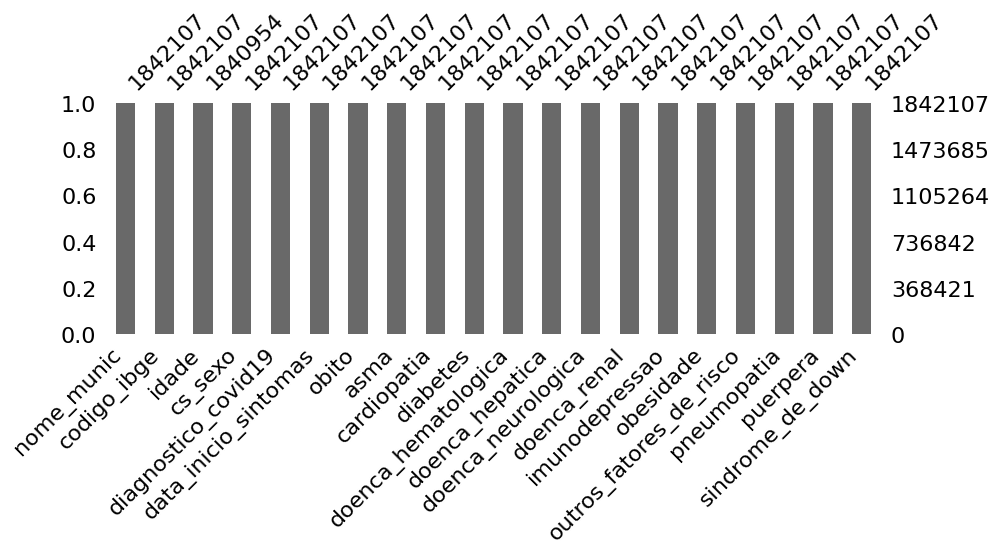

In [22]:
%%time
msno.bar(df, figsize=(10, 3))

In [23]:
df.isnull().sum()

nome_munic                    0
codigo_ibge                   0
idade                      1153
cs_sexo                       0
diagnostico_covid19           0
data_inicio_sintomas          0
obito                         0
asma                          0
cardiopatia                   0
diabetes                      0
doenca_hematologica           0
doenca_hepatica               0
doenca_neurologica            0
doenca_renal                  0
imunodepressao                0
obesidade                     0
outros_fatores_de_risco       0
pneumopatia                   0
puerpera                      0
sindrome_de_down              0
dtype: int64

Verificamos que há dados de idades faltantes. Verificando se podemos excluir esses dados:

In [24]:
total_nulos = df['idade'].isnull().sum()
total_registros = df.shape[0]
porcentagem = (total_nulos/total_registros) * 100
print(f'{porcentagem}%')

0.06259136955670871%


Como os dados nulos representam apenas 0.063%, vou excluí-los.

In [25]:
df.shape

(1842107, 20)

In [26]:
df.dropna(inplace=True)

In [27]:
df.shape

(1840954, 20)

## 3.4 Idade

### 3.4.1 Visualização da feature idade

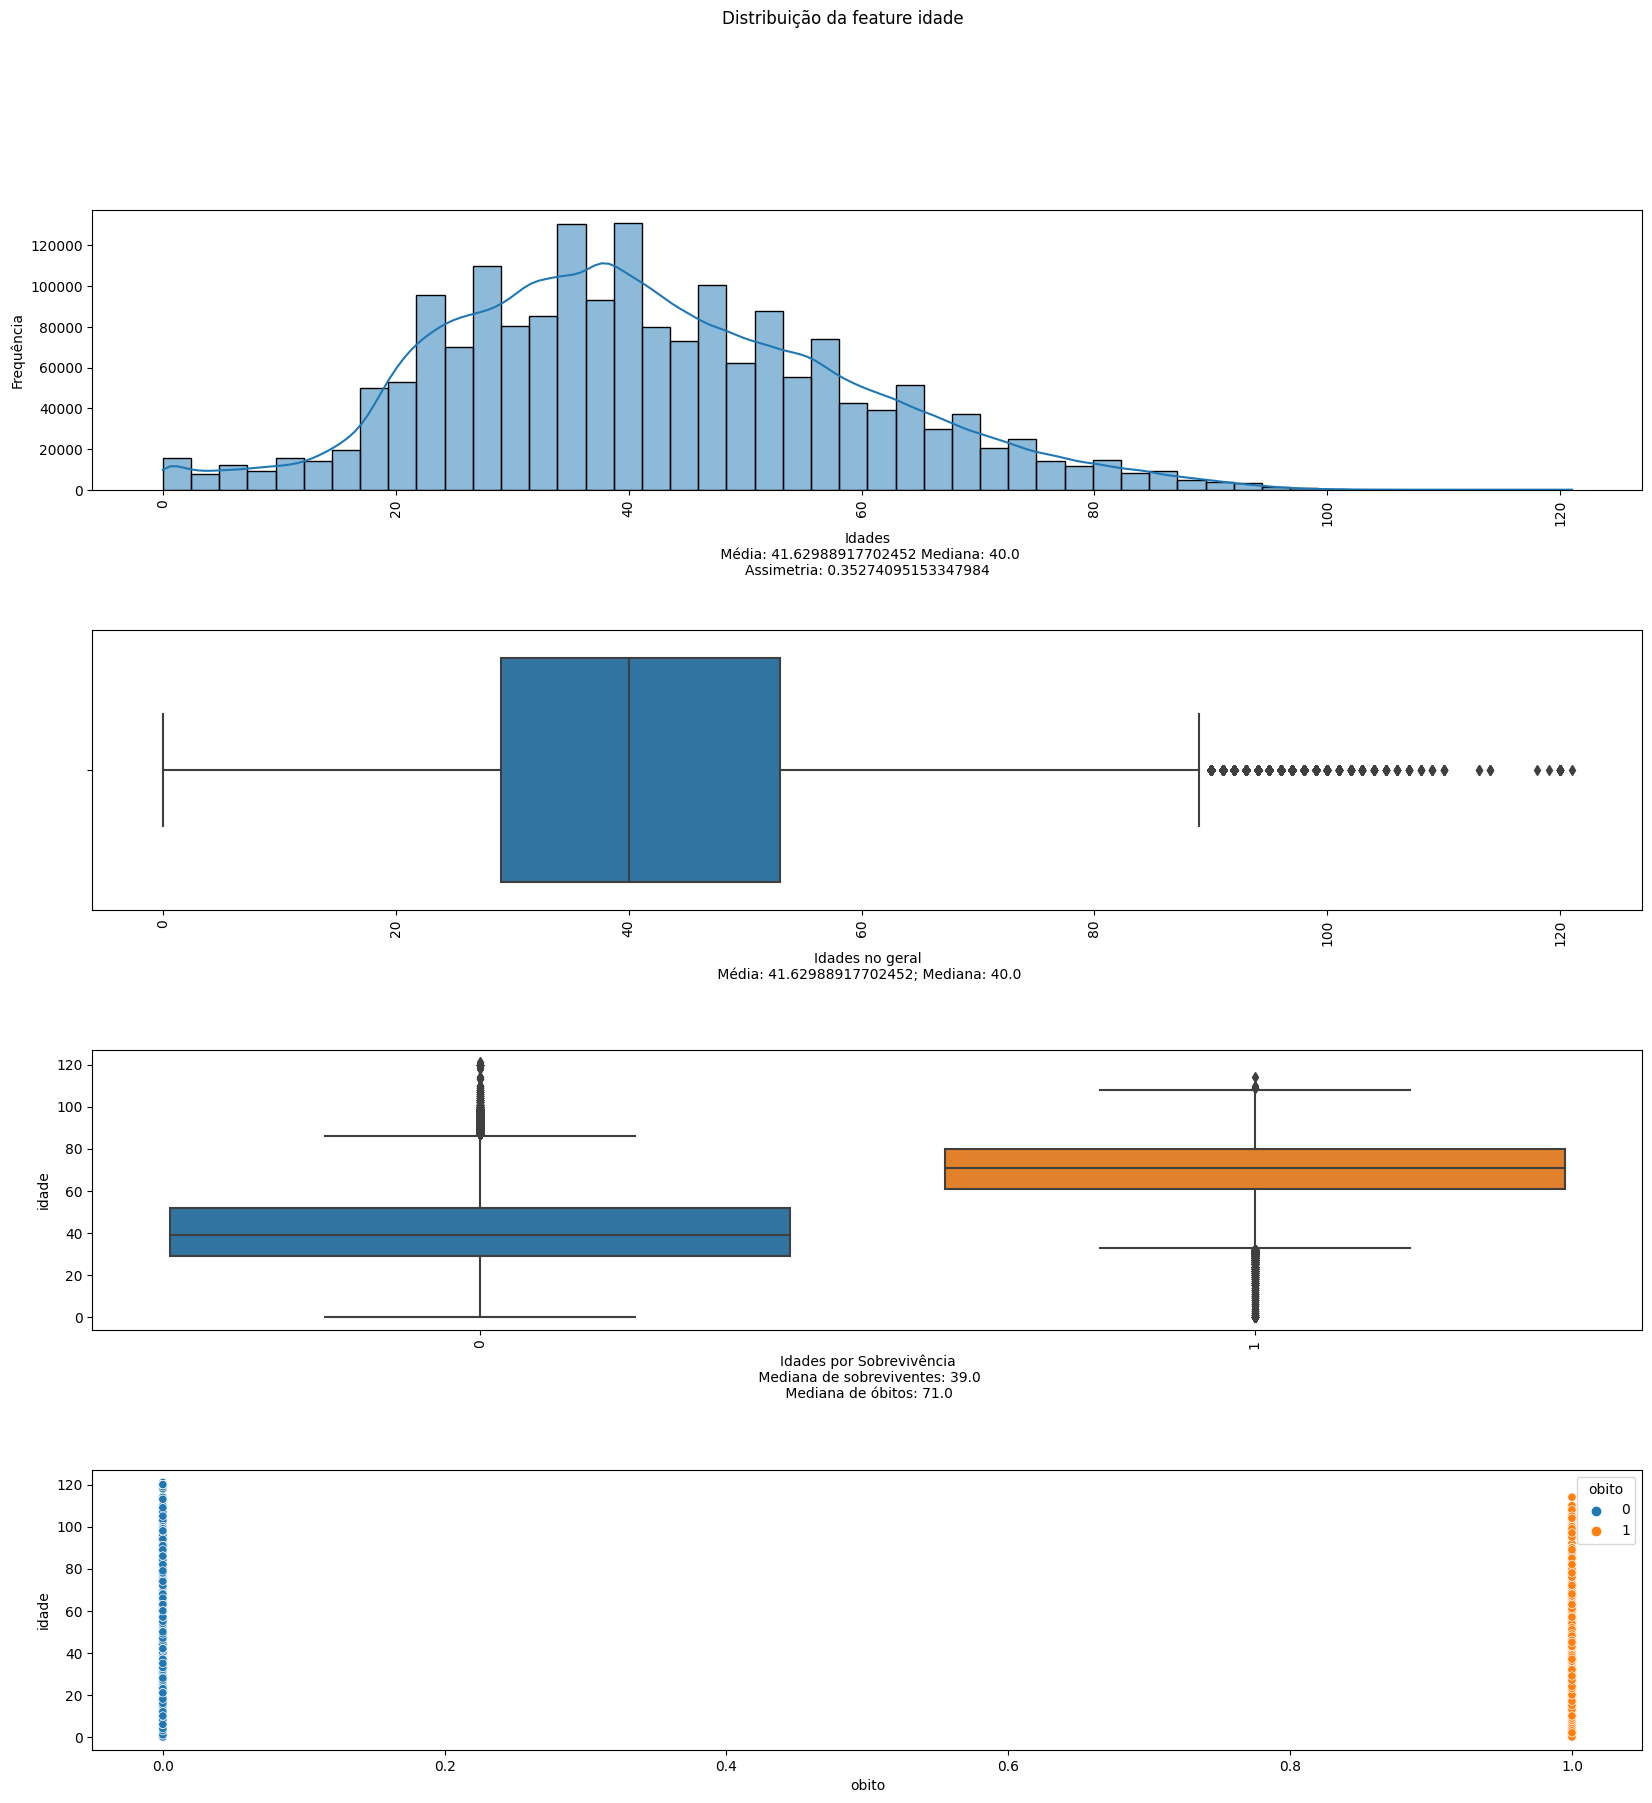

CPU times: user 1min, sys: 5.57 s, total: 1min 5s
Wall time: 1min 1s


In [28]:
%%time

fig, axes = plt.subplots(4, 1, figsize = (20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição da feature idade')

#Idade
sns.histplot(ax=axes[0],x=df['idade'], kde=True, bins=50)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Idades\n Média: ' + str(df['idade'].mean()) + ' Mediana: ' + str(df['idade'].median()) + '\nAssimetria: ' + str(df.idade.skew()), ylabel='Frequência')

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Idades no geral\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[2],x=df['obito'], y=df['idade'])
axes[2].tick_params(axis='x', rotation=90)
axes[2].set(xlabel='Idades por Sobrevivência\n Mediana de sobreviventes: ' + str(df.loc[df['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df.loc[df['obito'] == 1]['idade'].median()))

#Idade vs Óbito
sns.scatterplot(ax=axes[3], data=df, x="obito", y="idade", hue="obito")

plt.show();

* Há outliers acima de 100 anos muito estranhos.

Como há outliers acima de 100 anos, vou verificar se posso considerar somente dados abaixo ou igual à 100 anos.

In [29]:
total_casos_maior_100 = df[ df['idade'] > 100].shape[0]
total_registros = df.shape[0]
porcentagem = (total_casos_maior_100/total_registros) * 100
print(f'Há {total_casos_maior_100} casos com idade superior à 100 anos, correspondente à {porcentagem}% dos casos.')

Há 243 casos com idade superior à 100 anos, correspondente à 0.013199677993040566% dos casos.


Como representam apenas 0.013% dos dados, vou excluir registros com mais de 100 anos.

In [30]:
df.shape

(1840954, 20)

In [31]:
indexes2 = df[ df['idade'] > 100].index
df.drop(indexes2 , inplace=True)

In [32]:
df.shape

(1840711, 20)

Refazendo os gráficos:

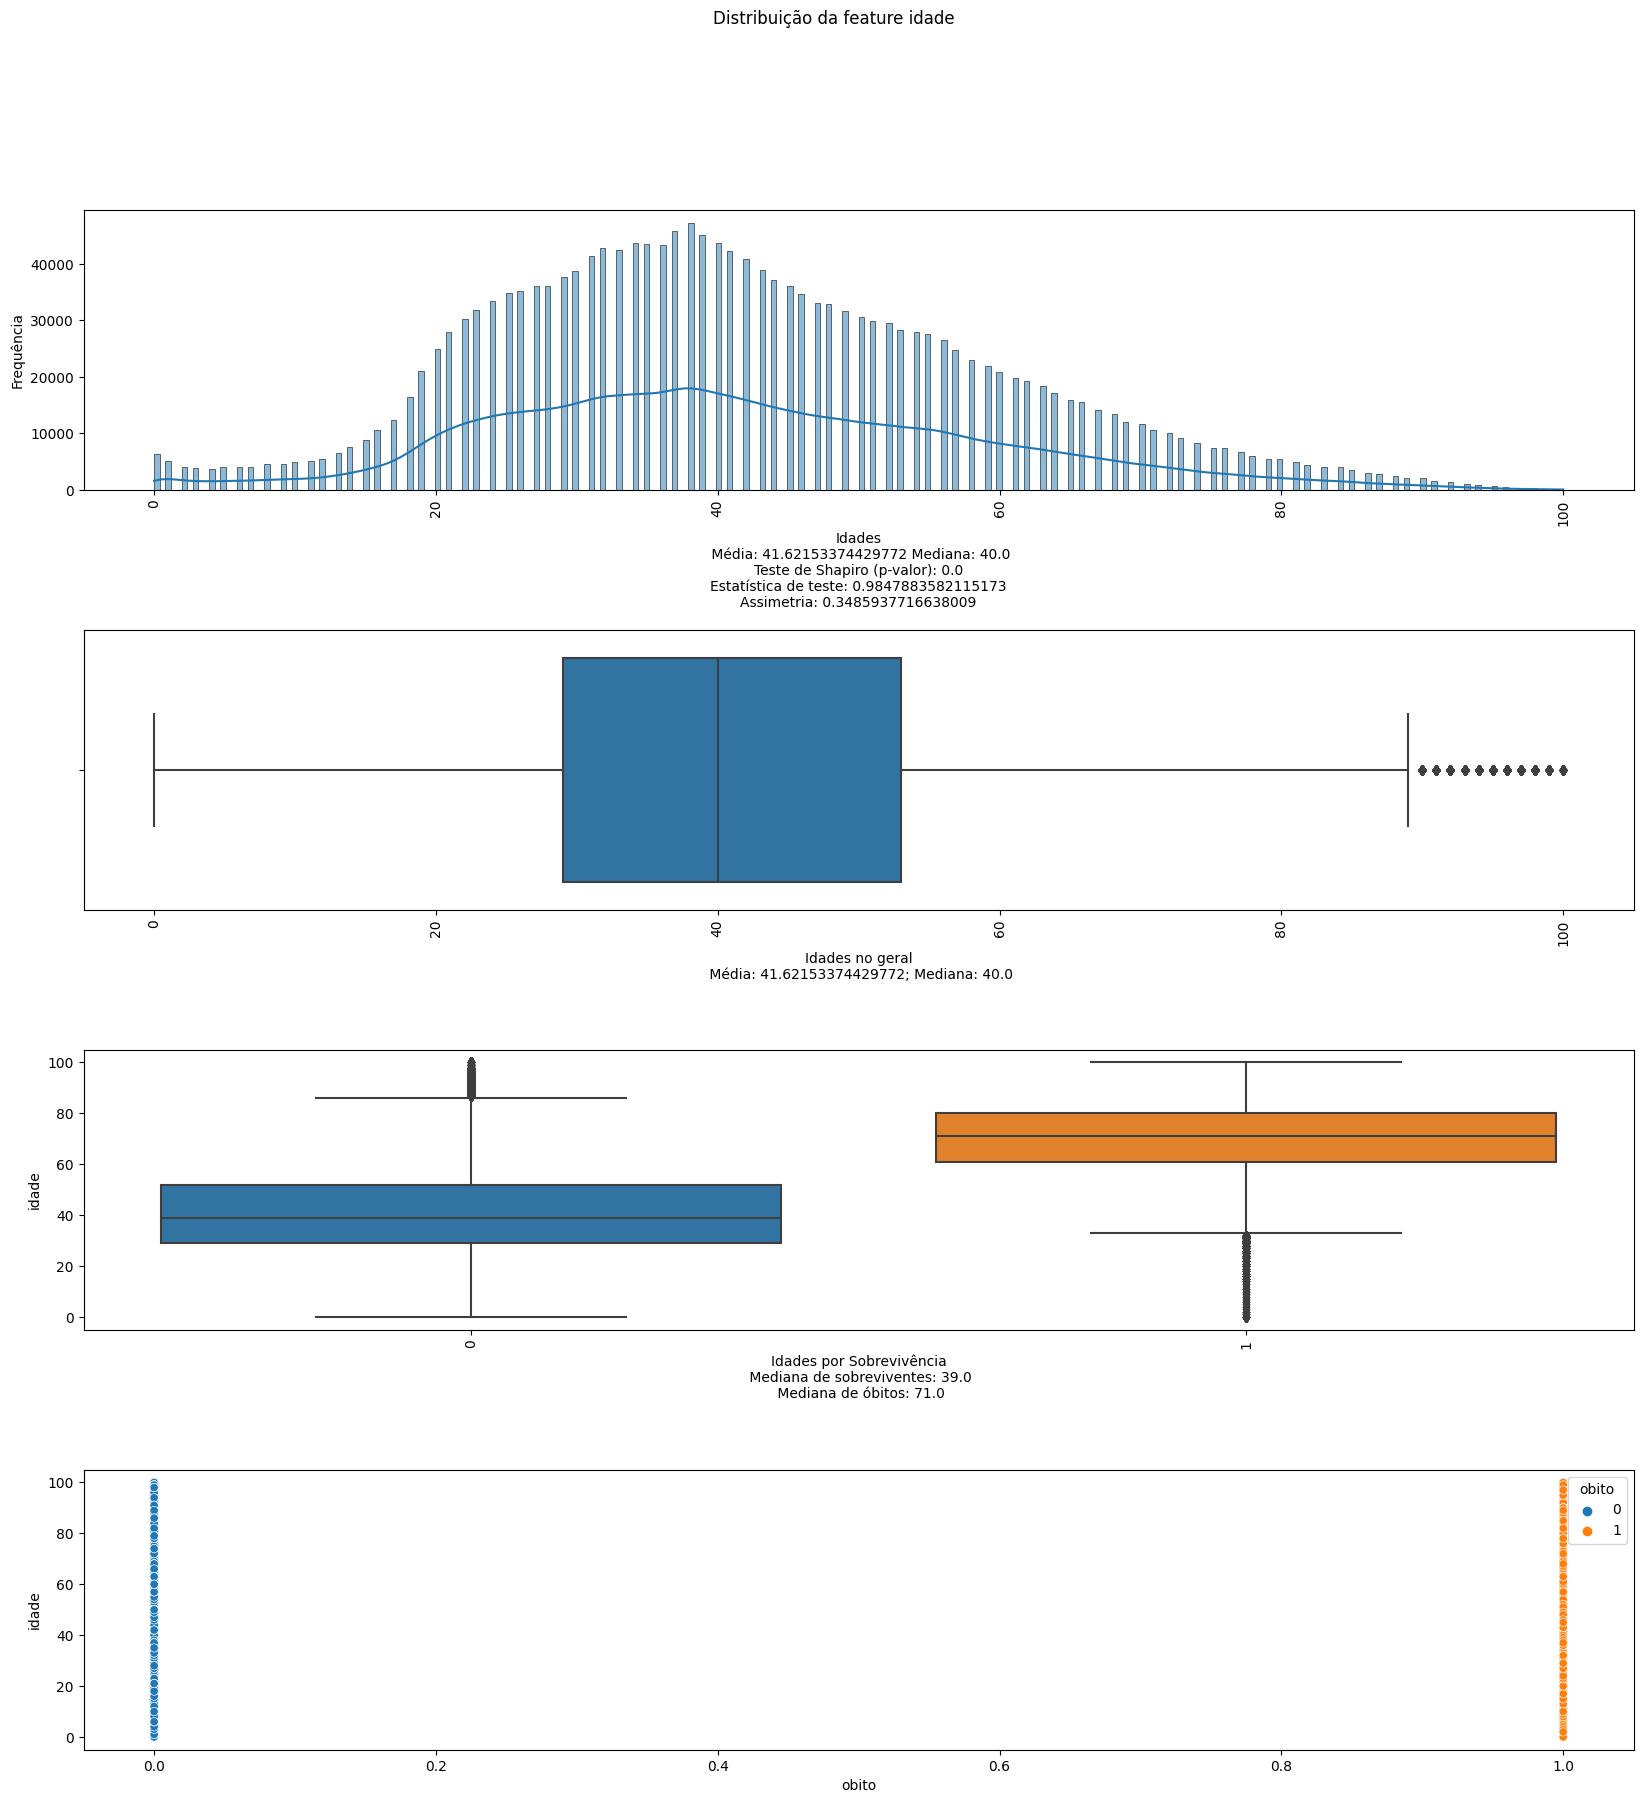

CPU times: user 1min 3s, sys: 6.42 s, total: 1min 10s
Wall time: 1min 5s


In [33]:
%%time
stat1,p1 = stats.shapiro(df['idade'].to_numpy())

fig, axes = plt.subplots(4, 1, figsize = (20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição da feature idade')

#Idade
sns.histplot(ax=axes[0],x=df['idade'], kde=True)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Idades\n Média: ' + str(df['idade'].mean()) + ' Mediana: ' + str(df['idade'].median()) + '\nTeste de Shapiro (p-valor): ' 
            + str(p1) + '\nEstatística de teste: ' + str(stat1) + '\nAssimetria: ' + str(df.idade.skew()), ylabel='Frequência')

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Idades no geral\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[2],x=df['obito'], y=df['idade'])
axes[2].tick_params(axis='x', rotation=90)
axes[2].set(xlabel='Idades por Sobrevivência\n Mediana de sobreviventes: ' + str(df.loc[df['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df.loc[df['obito'] == 1]['idade'].median()))

#Idade vs Óbito
sns.scatterplot(ax=axes[3], data=df, x="obito", y="idade", hue="obito")

plt.show();

* A média das idades no geral é de aproximadamente 41 anos e a mediana é 40.
* O teste de Shapiro-Wilk indica que a distribuição não é normal, pois p-value < 0.5.
* A assimetria positiva indica que existe uma concentração levemente maior de valores na zona de idades mais baixas da amostra.
* Os boxplots indicam que o grupo de sobreviventes tem mediana de 39 anos, e o grupo de óbitos tem mediana de 70 anos, o que indica mortalidade maior em pessoas com maior idade.
* A dispersão dos dados indicam que os dados tem pouca variabilidade, tanto no grupos de sobreviventes quanto no de óbitos.

### 3.4.2 Teste de hipótese sobre a relação de idade e óbito

Como visto anteriormente, a feature idade não tem distribuição normal. Uma indicação, como vimos [aqui](https://support.minitab.com/pt-br/minitab/19/help-and-how-to/statistics/basic-statistics/supporting-topics/normality/what-to-do-with-nonnormal-data/), é aplicar o Teste U de Mann-Whitney. Este [artigo](https://www.marsja.se/how-to-perform-mann-whitney-u-test-in-python-with-scipy-and-pingouin/) explica como executar este teste.

Dividindo o conjunto em dois grupos, um de sobreviventes e outro de óbitos.

In [39]:
df.head(1)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,...,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,log_idade
0,São Paulo,3550308,37.00000,FEMININO,CONFIRMADO,2020-10-15 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,...,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,3.61092


In [40]:
%%time
sobreviventes = df.loc[df['obito'] == 0]
obitos = df.loc[df['obito'] == 1]

CPU times: user 229 ms, sys: 93.4 ms, total: 322 ms
Wall time: 322 ms


In [41]:
print(f'Quantidade de sobreviventes: {sobreviventes.shape[0]}')
print(f'Quantidade de obitos: {obitos.shape[0]}')

Quantidade de sobreviventes: 1781218
Quantidade de obitos: 59493


Obtendo as médias de idades.

In [42]:
%%time
media_sobreviventes = sobreviventes['idade'].mean()
media_obitos = obitos['idade'].mean()
print(f'Média de idades de sobreviventes: {media_sobreviventes}')
print(f'Média de idades de obitos: {media_obitos}')

Média de idades de sobreviventes: 40.699535935522775
Média de idades de obitos: 69.22611063486461
CPU times: user 7.86 ms, sys: 0 ns, total: 7.86 ms
Wall time: 10.1 ms


Definindo as hipóteses:

Vamos fazer um teste unicaudal para um alfa = 0,05 para testar se podemos afirmar de forma estatisticamente significativa que os óbitos ocorrem mais frequentemente com pessoas com maior idade.

* H0 - Não há diferença relevante entre as idades de óbitos e sobreviventes
* H1 - A idade de óbitos é maior

Testando se a diferença entre as idades dos grupos é estatisticamente relevante com o Teste U.

In [43]:
%%time
#teste = mwu(obitos['idade'], sobreviventes['idade'], alternative='greater') - estoura a memória disponível no Colab Free
teste = stats.mannwhitneyu(obitos['idade'], sobreviventes['idade'], alternative="greater")

CPU times: user 2.21 s, sys: 3.41 ms, total: 2.21 s
Wall time: 2.24 s


In [44]:
print('O valor da estatística do Teste U: ' + str(teste[0]))
print('O valor de p do Teste U: ' + str(teste[1]))

O valor da estatística do Teste U: 94603257655.0
O valor de p do Teste U: 0.0


Com o p-valor < 0.05, temos argumento estatístico para afirmar que óbitos ocorrem mais frequentemente em idades mais altas. Podemos dizer com 95% de confiança que pessoas com maior idade estão mais propensas a ter maiores complicações com a doença.

## 3.5 Problema gerado pela alta frequência de valores 'IGNORADO' nas variáveis

Durante a análise descritiva, percebemos que a frequência de 'IGNORADO' nas colunas de doenças é muito grande.

In [45]:
df.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'cs_sexo', 'diagnostico_covid19',
       'data_inicio_sintomas', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down', 'log_idade'],
      dtype='object')

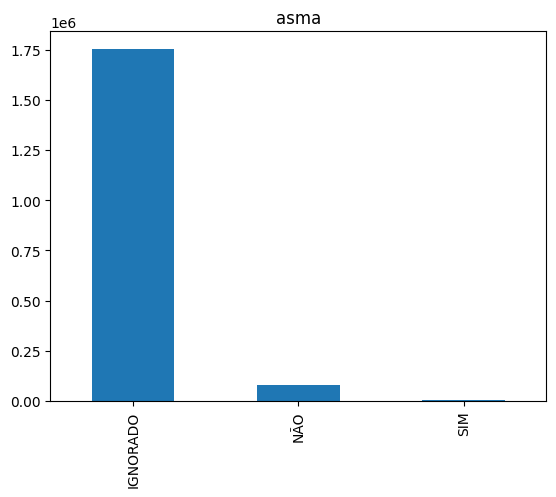

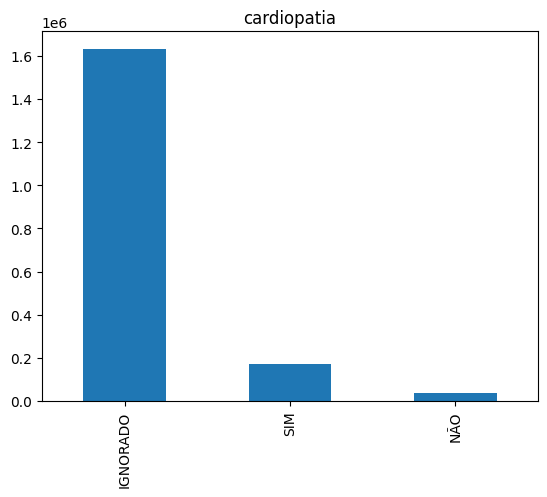

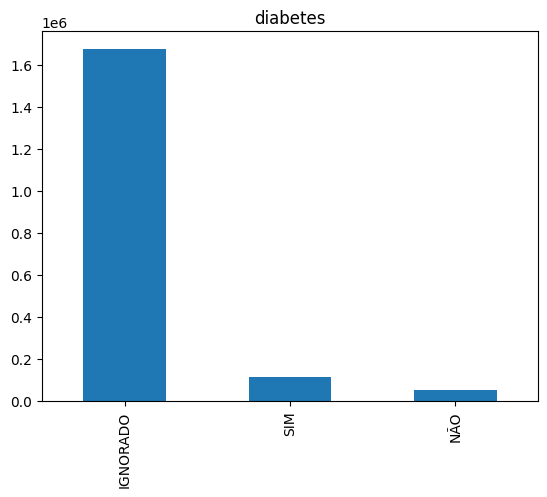

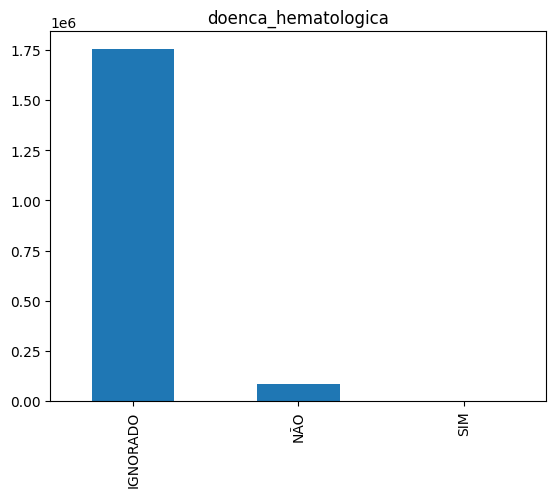

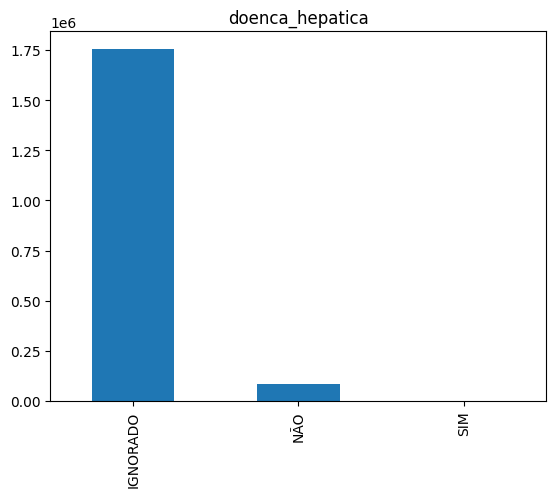

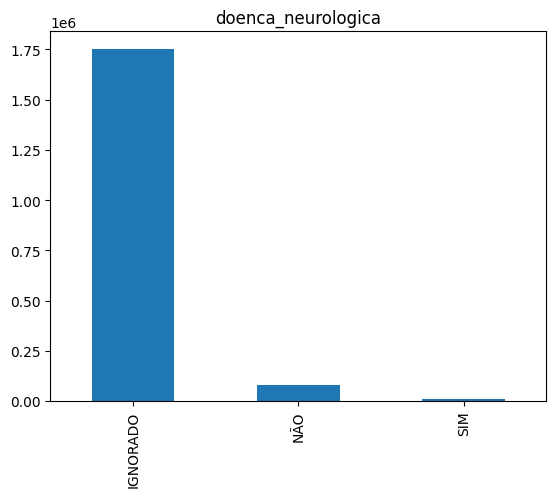

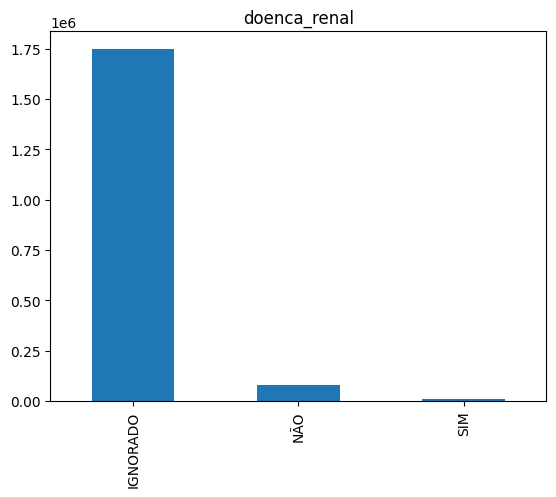

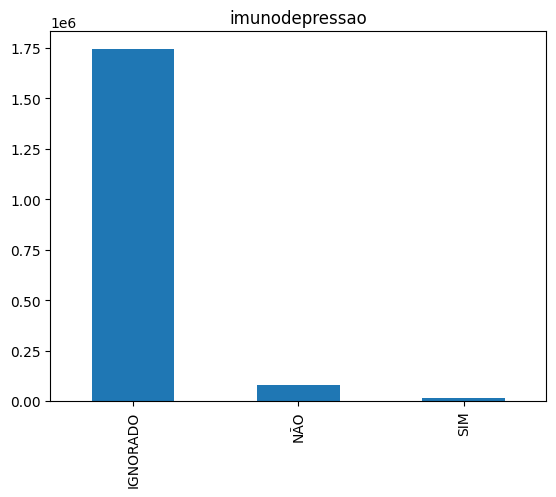

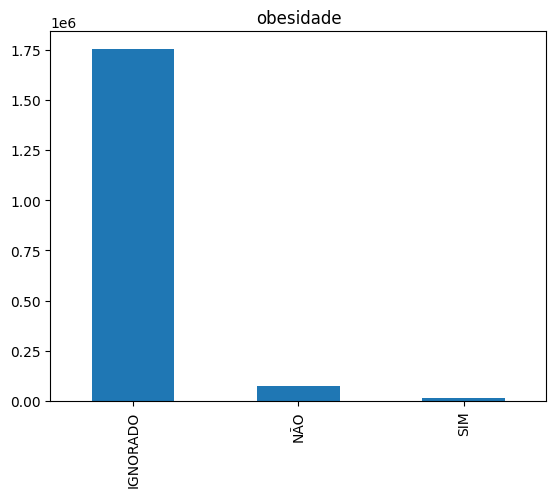

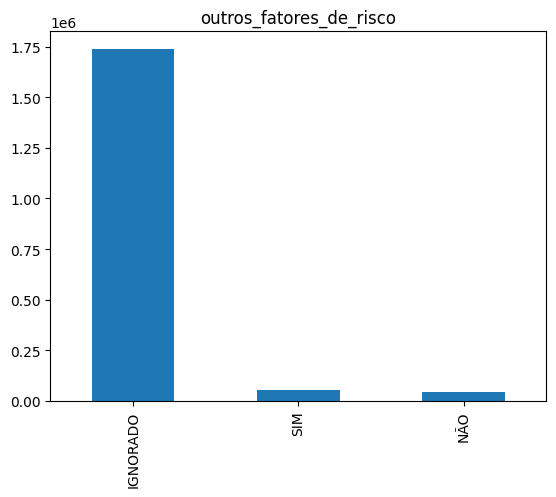

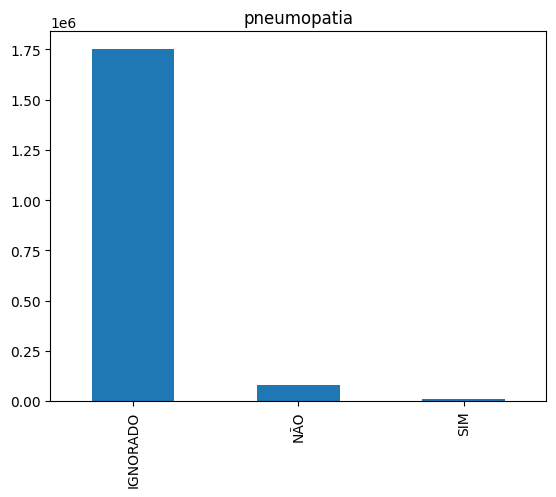

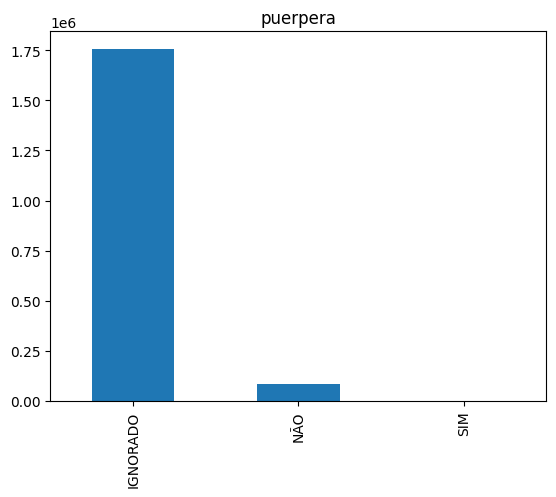

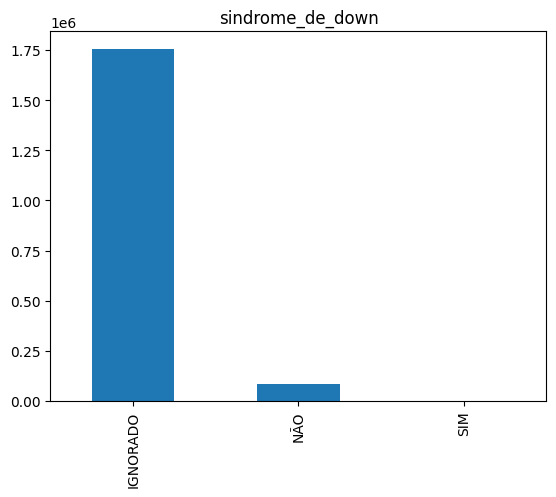

CPU times: user 4.26 s, sys: 1.1 s, total: 5.36 s
Wall time: 4.52 s


In [46]:
%%time
colunas_doencas = ['asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down']

for coluna in colunas_doencas:
  df[coluna].value_counts().plot.bar(title=coluna)
  plt.show();

### 3.5.1 Teste de hipótese para ver se a amostra sem IGNORADO difere do conjunto completo

Como uma ideia de solucionar, pensamos em utilizar o dataframe limpo de campos com IGNORADO que obtemos no início e focar na cidade com maior número de casos, que é São Paulo. Mas antes, para validar se foge muito da população, vamos testar se o dataframe sem ignorados tem diferença estatísticamente relevante entre as idades.

Já criamos um grupo sem ignorados antes.

In [47]:
df_sem_ignorados.shape

(190219, 20)

Fazendo o Teste U.

H0 -> Não há diferença entre as idades dos grupos

H1 -> Há diferença entre as idades dos dois grupos

In [48]:
teste2 = stats.mannwhitneyu(df_sem_ignorados['idade'], df['idade'], alternative="two-sided")

In [50]:
print('O valor da estatística do Teste U: ' + str(teste2[0]))
print('O valor de p do Teste U: ' + str(teste2[1]))

O valor da estatística do Teste U: 281254241412.0
O valor de p do Teste U: 0.0


Como p-valor < 0.5, refuto H0. Há diferença significativa de idade entre os grupos com IGNORADO e sem valores com IGNORADO.

Visualizando:

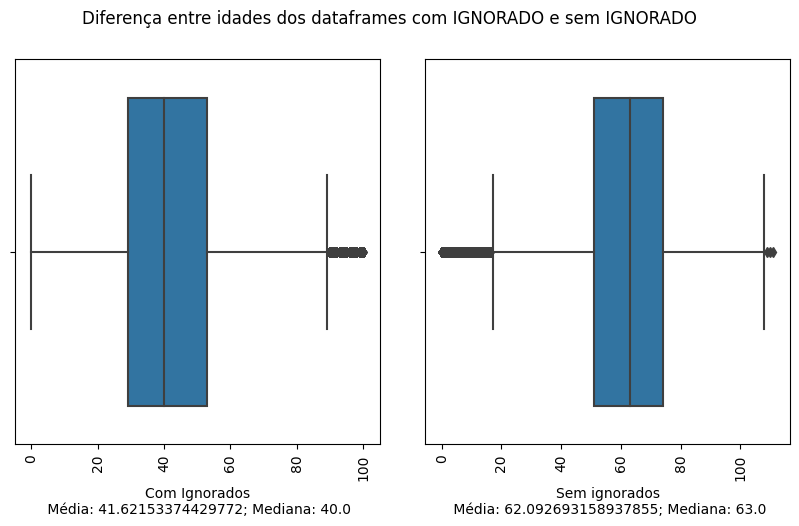

CPU times: user 350 ms, sys: 106 ms, total: 457 ms
Wall time: 341 ms


In [51]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (10,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Diferença entre idades dos dataframes com IGNORADO e sem IGNORADO')

#Idade - Boxplot
sns.boxplot(ax=axes[0],x=df['idade'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Com Ignorados\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df_sem_ignorados['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Sem ignorados\n Média: ' + str(df_sem_ignorados['idade'].mean()) + '; Mediana: ' + str(df_sem_ignorados['idade'].median()))

plt.show();

Temos que diferem muito nas distribuições das idades.

### 3.5.1 Teste de hipótese para ver se a amostra sem IGNORADO da cidade de São Paulo difere do conjunto completo

Hipóteses:

H0 -> Os dados não mostram diferenças de idade entre os grupos

H1 -> O grupos tem diferenças de idades

Obtendo os grupos.

In [52]:
%%time
df_sp = df.loc[df.nome_munic == 'São Paulo']
df_sp_si = df_sem_ignorados.loc[df_sem_ignorados.nome_munic == 'São Paulo']

CPU times: user 196 ms, sys: 307 µs, total: 196 ms
Wall time: 207 ms


In [53]:
df_sp_si.to_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/df_sp_sem_ignorados.csv')

Fazendo o teste

In [54]:
teste3 = stats.mannwhitneyu(df_sp_si['idade'], df_sp['idade'], alternative="two-sided")

In [55]:
print('O valor da estatística do Teste U: ' + str(teste3[0]))
print('O valor de p do Teste U: ' + str(teste3[1]))

O valor da estatística do Teste U: 15273410249.0
O valor de p do Teste U: 0.0


Com p-valor < 0.5, rejeita-se a hipótese nula. A distribuição das idades são diferentes.

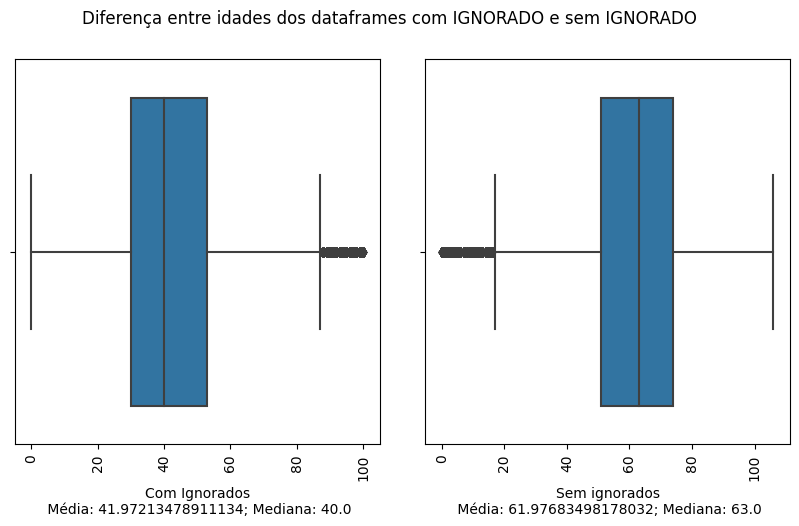

CPU times: user 255 ms, sys: 106 ms, total: 361 ms
Wall time: 256 ms


In [56]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (10,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Diferença entre idades dos dataframes com IGNORADO e sem IGNORADO')

#Idade - Boxplot
sns.boxplot(ax=axes[0],x=df_sp['idade'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Com Ignorados\n Média: ' + str(df_sp['idade'].mean()) + '; Mediana: ' + str(df_sp['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df_sp_si['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Sem ignorados\n Média: ' + str(df_sp_si['idade'].mean()) + '; Mediana: ' + str(df_sp_si['idade'].median()))

plt.show();

Será que a relação de idade e óbito que vimos antes muda em São Paulo com relação ao conjunto completo?

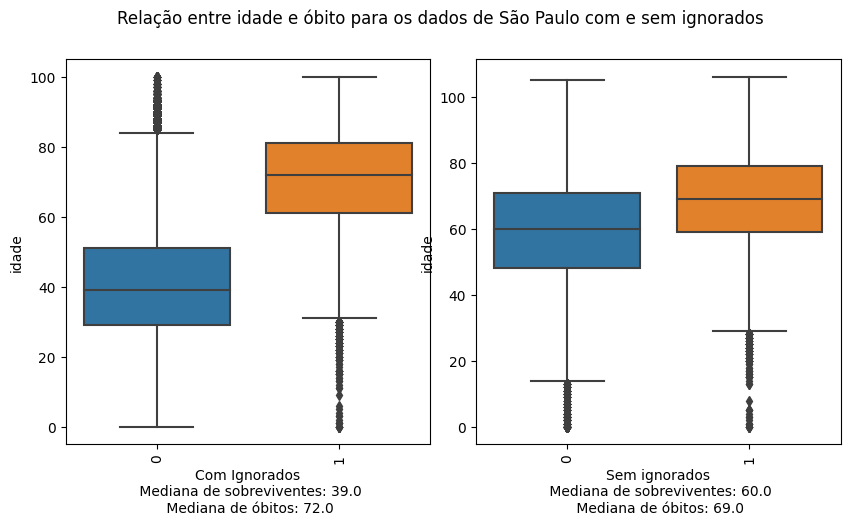

CPU times: user 409 ms, sys: 103 ms, total: 512 ms
Wall time: 394 ms


In [57]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (10,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Relação entre idade e óbito para os dados de São Paulo com e sem ignorados')

#Idade - Boxplot
sns.boxplot(ax=axes[0],x=df_sp['obito'], y=df_sp['idade'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Com Ignorados\n Mediana de sobreviventes: ' + str(df_sp.loc[df_sp['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df_sp.loc[df_sp['obito'] == 1]['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df_sp_si['obito'], y=df_sp_si['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Sem ignorados\n Mediana de sobreviventes: ' + str(df_sp_si.loc[df_sp_si['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df_sp_si.loc[df_sp_si['obito'] == 1]['idade'].median()))

plt.show();

Muda bastante a distribuição de sobreviventes, jogando a mediana para valores de idades mais altos. Muda pouco a distribuição de óbitos. Mas conserva a relação idade/óbito.

### 3.5.2 Teste para validar se o conjunto para a cidade de São Paulo sem IGNORADO conserva a relação de que pessoas com maior idade são mais propensas à complicações

Hipóteses:

H0 -> Os dados não mostram diferenças de idade entre os grupos

H1 -> O grupo de óbitos tem idades maiores

Obtendo os grupos.

In [58]:
%%time
obitos_sp = df_sp_si.loc[df_sp_si.obito == 1]
sobreviventes_sp = df_sp_si.loc[df_sp_si.obito == 0]

CPU times: user 9.87 ms, sys: 0 ns, total: 9.87 ms
Wall time: 11.6 ms


In [59]:
%%time
teste4 = stats.mannwhitneyu(obitos_sp['idade'], sobreviventes_sp['idade'], alternative="greater")

CPU times: user 24.8 ms, sys: 0 ns, total: 24.8 ms
Wall time: 24.7 ms


In [60]:
print('O valor da estatística do Teste U: ' + str(teste4[0]))
print('O valor de p do Teste U: ' + str(teste4[1]))

O valor da estatística do Teste U: 215706009.5
O valor de p do Teste U: 0.0


Como p-valor < 0.5, rejeitamos HO e concluímos que a relação idade/óbito ainda se mantém. A partir de agora, vamos utilizar utilizar a amostra da cidade de São Paulo sem doenças com valores IGNORADOS.

In [61]:
df_sp_si.shape

(38420, 20)

OBSERVAÇÕES:

* Ao resumir os dados retirando registros onde aparecem 'IGNORADO' nos campos de doenças, diminuímos o conjunto original de 5.852.960 registros para o Estado de São Paulo todo para 38420 registros completos da cidade de São Paulo. Em produção, é possível que o comportamento das populações da capital e do estado sejam totalmente diferentes.
* Apesar da fonte oficial, é difícil dizer se os registros foram preenchidos corretamente e se são 100% confiáveis.

### 3.5.3 Análise descritiva dos dados da cidade de São Paulo

In [62]:
df_sp_si.describe(include='all')

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
count,38420,38420.00000,38420.00000,38420,38420,38419,38420.00000,38420,38420,38420,38420,38420,38420,38420,38420,38420,38420,38420,38420,38420
unique,1,NaN,NaN,2,1,915,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2
top,São Paulo,NaN,NaN,MASCULINO,CONFIRMADO,2021-03-01 00:00:00+00:00,NaN,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
freq,38420,NaN,NaN,20112,38420,210,NaN,36433,22040,24101,37816,37852,35857,36065,36486,33239,21974,36124,38283,38269
first,NaN,NaN,NaN,NaN,NaN,2020-03-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-10-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3550308.00000,61.97683,NaN,NaN,NaN,0.33144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.00000,17.13039,NaN,NaN,NaN,0.47074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3550308.00000,0.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3550308.00000,51.00000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Há 38420 casos confirmados n cidade de São Paulo
* Há mais casos confirmados entre Homens

<Axes: ylabel='Frequency'>

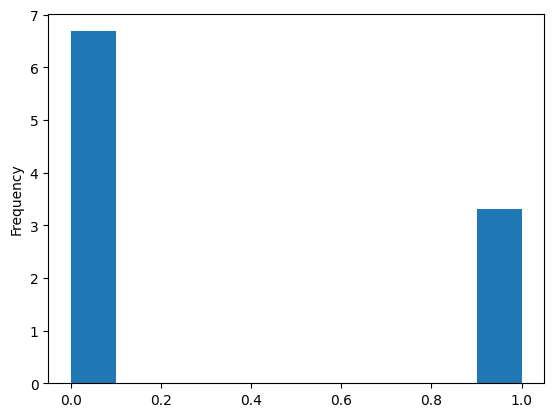

In [63]:
df_sp_si['obito'].plot.hist(density=True)

## 3.6 Visualização das features de doenças

In [64]:
df_sp_si.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'cs_sexo', 'diagnostico_covid19',
       'data_inicio_sintomas', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down'],
      dtype='object')

In [65]:
df_doencas = df_sp_si[['asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down']]
df_doencas.head(2)

,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
29,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
74,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO


### 3.6.1 Visualizações

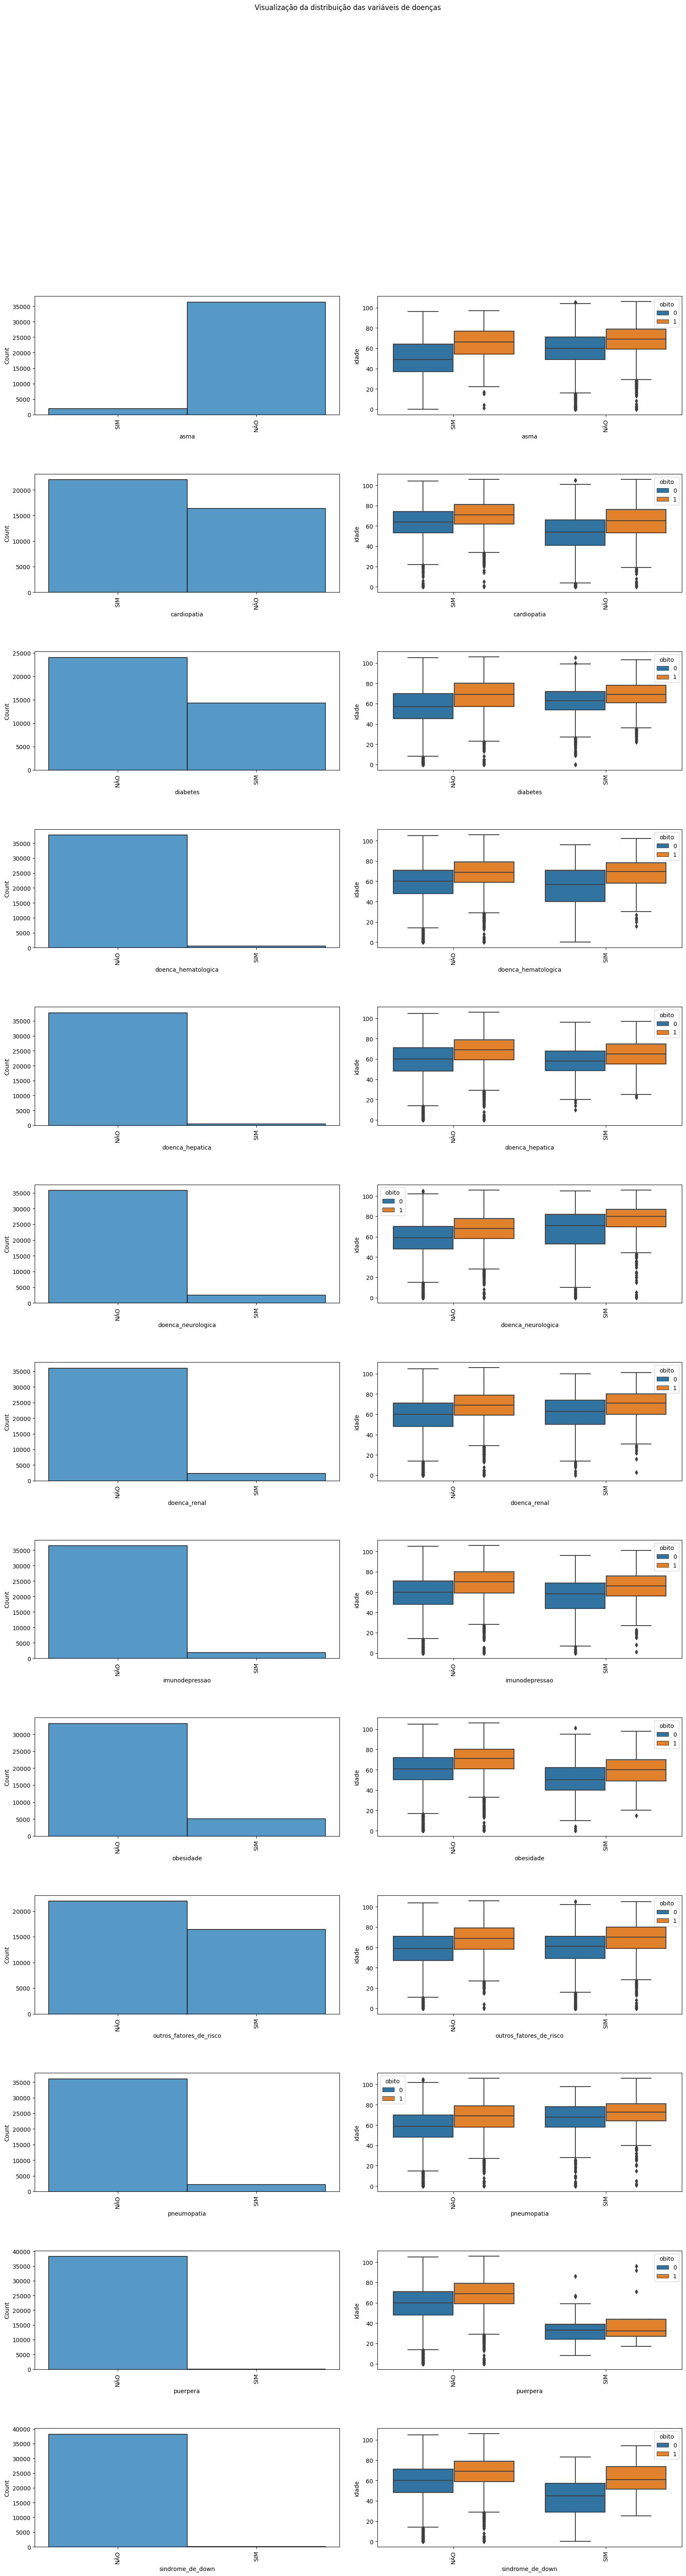

CPU times: user 4.43 s, sys: 132 ms, total: 4.56 s
Wall time: 4.41 s


In [66]:
%%time
fig1, axes1 = plt.subplots(len(df_doencas.columns), 2, figsize = (20,70))
fig1.subplots_adjust(hspace=0.5, wspace=0.125)
fig1.suptitle('Visualização da distribuição das variáveis de doenças')


for i, doenca in enumerate(df_doencas.columns):
  #Frequencia
  sns.histplot(ax=axes1[i][0],x=df_sp_si[doenca])
  axes1[i][0].tick_params(axis='x', rotation=90)

  #Boxplot
  sns.boxplot(ax=axes1[i][1],x=df_sp_si[doenca], y=df_sp_si['idade'], hue=df_sp_si['obito'])
  axes1[i][1].tick_params(axis='x', rotation=90)

plt.show();

# 4 Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.

In [67]:
df_sp_si.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38420 entries, 29 to 5089471
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   nome_munic               38420 non-null  object             
 1   codigo_ibge              38420 non-null  int64              
 2   idade                    38420 non-null  float64            
 3   cs_sexo                  38420 non-null  object             
 4   diagnostico_covid19      38420 non-null  object             
 5   data_inicio_sintomas     38419 non-null  datetime64[ns, UTC]
 6   obito                    38420 non-null  int64              
 7   asma                     38420 non-null  object             
 8   cardiopatia              38420 non-null  object             
 9   diabetes                 38420 non-null  object             
 10  doenca_hematologica      38420 non-null  object             
 11  doenca_hepatica          

## 4.1 Excluindo algumas colunas

Como a intenção do projeto é prever óbitos de covid com base em doenças pré-existentes, vou retirar as colunas de gravidez e Síndrome de Down. Outro fator é que elas estão muito desbalanceadas. Também vou retirar a coluna de outros_fatores_de_risco, pois não dá para saber o que representa.

In [71]:
del df_sp_si['outros_fatores_de_risco']
#del df_sp_si['puerpera']
#del df_sp_si['sindrome_de_down']

Vamos manter as colunas para este treinamento com redes neurais.

## 4.1 Transformando respostas 'SIM' ou 'NÃO' em 1 e 0, respectivamente.

In [72]:
df_pronto = df_sp_si.replace('SIM', 1)
df_pronto = df_pronto.replace('NÃO', 0)

## 4.2 Convertendo 'MASCULINO' e 'FEMININO' em 0 e 1, respectivamente

In [73]:
df_pronto = df_pronto.replace('MASCULINO', 0)
df_pronto = df_pronto.replace('FEMININO', 1)

## 4.3 Selecionando as features que vamos utilizar

In [74]:
df_pronto.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'cs_sexo', 'diagnostico_covid19',
       'data_inicio_sintomas', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia',
       'puerpera', 'sindrome_de_down'],
      dtype='object')

In [75]:
df_ml = df_pronto[['idade', 'cs_sexo', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia', 'puerpera', 'sindrome_de_down']]

In [76]:
df_ml.to_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/df_pronto.csv', index=False)

In [77]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38420 entries, 29 to 5089471
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idade                38420 non-null  float64
 1   cs_sexo              38420 non-null  int64  
 2   obito                38420 non-null  int64  
 3   asma                 38420 non-null  int64  
 4   cardiopatia          38420 non-null  int64  
 5   diabetes             38420 non-null  int64  
 6   doenca_hematologica  38420 non-null  int64  
 7   doenca_hepatica      38420 non-null  int64  
 8   doenca_neurologica   38420 non-null  int64  
 9   doenca_renal         38420 non-null  int64  
 10  imunodepressao       38420 non-null  int64  
 11  obesidade            38420 non-null  int64  
 12  pneumopatia          38420 non-null  int64  
 13  puerpera             38420 non-null  int64  
 14  sindrome_de_down     38420 non-null  int64  
dtypes: float64(1), int64(14)
memory u

## 4.4 Análise de correlação

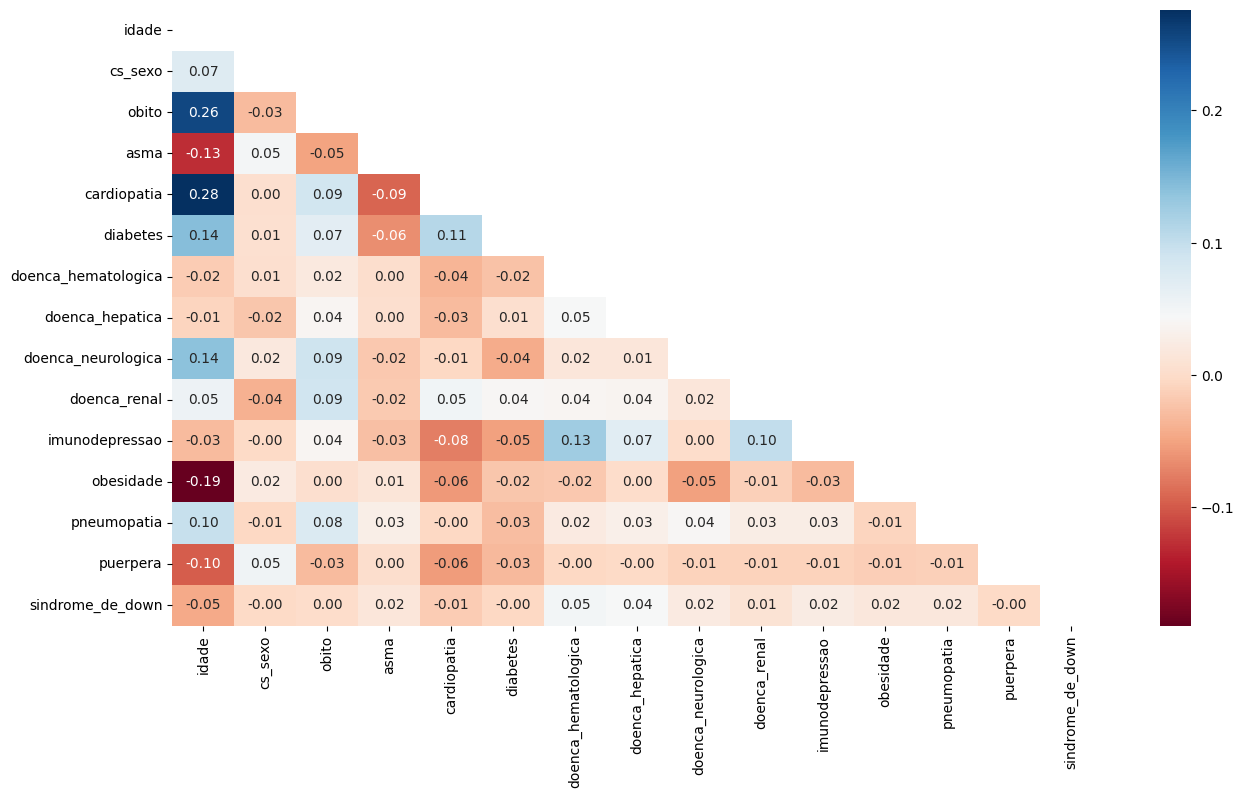

CPU times: user 558 ms, sys: 88.2 ms, total: 646 ms
Wall time: 563 ms


In [78]:
%%time
sns.set_context(font_scale=1.9)
plt.figure(figsize=(15,8))
sns.heatmap(
    df_ml.corr(), annot=True, fmt='.2f', cmap='RdBu', mask=np.triu(np.ones_like(df_ml.corr())))
plt.show()

* A feature idade tem uma correlação positiva com a feature obito.
* A feature idade tem uma correlação positiva com cardiopatia.

## 4.5 Visualização da variável target

In [79]:
g = sns.countplot(df_ml['obito'])
g.set_xticklabels(['Não', 'Sim'])
plt.show()

KeyError: ignored

## 4.6 Normalização da feature idade e Feature Engineering

### 4.6.1 Normalização

In [80]:
%%time

df_ml_bk = df_ml.copy()

from sklearn.preprocessing import MinMaxScaler

coluna = np.array(df_ml['idade']).reshape(-1,1)
df_ml['idade_norm'] = MinMaxScaler().fit_transform(coluna)

CPU times: user 43.4 ms, sys: 9.7 ms, total: 53.1 ms
Wall time: 96.7 ms


In [81]:
df_ml.head()

,idade,cs_sexo,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,pneumopatia,puerpera,sindrome_de_down,idade_norm
29,43.00000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.40566
74,83.00000,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0.78302
92,39.00000,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0.36792
135,52.00000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.49057
149,76.00000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.71698


### 4.6.2 Criando uma feature de quantidade de doenças por registro

Não vamos aplicar no caso desse treinamento com rede neural, devido à natureza end-to-end do aprendizado profundo.

In [82]:
#df_ml.columns

In [83]:
#df_ml['quantidade_doencas'] = df_ml.iloc[:,3:13].sum(axis=1)

In [84]:
#df_ml.head(2)

## 4.7 Tratando o desbalanceamento com oversampling

Tratar o desbalanceamento não trouxe melhores resultados.

### 4.7.1 IMportando o imbalanced-learn

In [85]:
#df_ml_bk = df_ml.copy()

In [86]:
#!pip install imbalanced-learn

In [87]:
#from imblearn.over_sampling import SMOTE
#from collections import Counter

### 4.7.2 Aplicando o oversampling

In [88]:
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

In [89]:
#contagem = Counter(y)
#print(contagem)

## 4.8 Separação do conjunto em conjuntos de treino e teste

### 4.8.1 Separando em datasets de features e target

In [90]:
df_ml.columns

Index(['idade', 'cs_sexo', 'obito', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia',
       'puerpera', 'sindrome_de_down', 'idade_norm'],
      dtype='object')

In [99]:
X = df_ml[['idade_norm', 'cs_sexo', 'asma', 'cardiopatia', 'diabetes',
       'doenca_hematologica', 'doenca_hepatica', 'doenca_neurologica',
       'doenca_renal', 'imunodepressao', 'obesidade', 'pneumopatia', 'puerpera', 'sindrome_de_down']].values

In [100]:
y = df_ml['obito'].values

In [101]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    shuffle=True)

# 5 Modelagem com Keras

In [110]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

### 5.1.1 Criando o modelo

In [96]:
classifier = Sequential()

Dimensão do dataset de treino:

In [102]:
X_treino.shape

(25741, 14)

Serão 14 neurônios de entrada e 1 de saída, indicando a classificação.

In [103]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [104]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 90        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


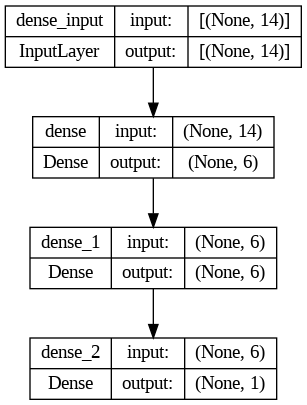

In [106]:
tf.keras.utils.plot_model(classifier, to_file='model.png', show_shapes=True)

### 5.1.2 Compilando o modelo

In [112]:
%%time
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

CPU times: user 12.5 ms, sys: 25 µs, total: 12.5 ms
Wall time: 30 ms


### 5.1.3 Treinando o modelo

In [114]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=15, mode='min')
history = classifier.fit(X_treino, y_treino, batch_size=32, epochs=500, validation_data = (X_teste, y_teste), shuffle=True, callbacks=[early_stopping])

Epoch 1/500
805/805 [==============================] - 5s 6ms/step - loss: 0.5869 - accuracy: 0.6897 - val_loss: 0.5939 - val_accuracy: 0.6804
Epoch 2/500
805/805 [==============================] - 4s 5ms/step - loss: 0.5871 - accuracy: 0.6902 - val_loss: 0.5942 - val_accuracy: 0.6804
Epoch 3/500
805/805 [==============================] - 3s 4ms/step - loss: 0.5869 - accuracy: 0.6887 - val_loss: 0.5938 - val_accuracy: 0.6792
Epoch 4/500
805/805 [==============================] - 3s 4ms/step - loss: 0.5866 - accuracy: 0.6898 - val_loss: 0.5942 - val_accuracy: 0.6793
Epoch 5/500
805/805 [==============================] - 4s 5ms/step - loss: 0.5867 - accuracy: 0.6915 - val_loss: 0.5944 - val_accuracy: 0.6808
Epoch 6/500
805/805 [==============================] - 5s 6ms/step - loss: 0.5869 - accuracy: 0.6894 - val_loss: 0.5942 - val_accuracy: 0.6807
Epoch 7/500
805/805 [==============================] - 4s 5ms/step - loss: 0.5869 - accuracy: 0.6890 - val_loss: 0.5940 - val_accuracy: 0.6825

### 5.1.3 Predição

Visualização das probabilidades da Regressão Logística

In [ ]:
%%time
y_pred = logreg.predict(X_teste)

CPU times: user 8.61 ms, sys: 12.1 ms, total: 20.7 ms
Wall time: 15.5 ms


In [ ]:
%%time
y_pred_proba = logreg.predict_proba(X)
print(y_pred_proba)

[[0.70116925 0.29883075]
 [0.48031033 0.51968967]
 [0.65688683 0.34311317]
 ...
 [0.75652418 0.24347582]
 [0.73087113 0.26912887]
 [0.64097933 0.35902067]]
CPU times: user 12.5 ms, sys: 4.08 ms, total: 16.6 ms
Wall time: 13.8 ms


### 5.1.4 Métricas

#### 5.1.4.1 Acurácia

In [ ]:
%%time
print(f'Acurácia: {accuracy_score(y_teste, y_pred)}\n\Precisão: {precision_score(y_teste, y_pred)}\n\
      Revocação: {recall_score(y_teste, y_pred)} \nF1 Score: {f1_score(y_teste,  y_pred, pos_label = 0)}')

Acurácia: 0.6898576369339661
\Precisão: 0.5740378343118069
      Revocação: 0.21552779818760714 
F1 Score: 0.7996883116883118
CPU times: user 34.2 ms, sys: 35.9 ms, total: 70 ms
Wall time: 43.1 ms


#### 5.1.4.2 Matriz de Confusão

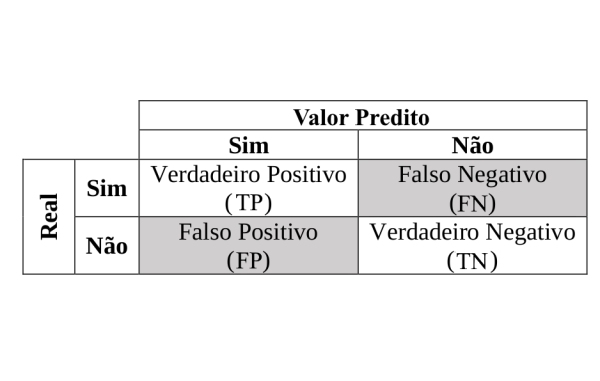

Matriz do modelo normal (logreg)

CPU times: user 59.5 ms, sys: 32.8 ms, total: 92.3 ms
Wall time: 72.1 ms


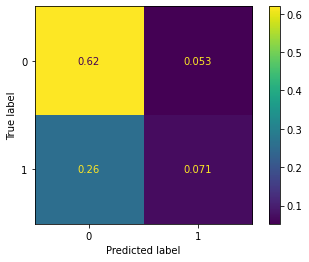

In [ ]:
%%time
cm_logreg2 = confusion_matrix(y_teste, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg2, display_labels=logreg.classes_)
disp.plot(values_format='.2g') 

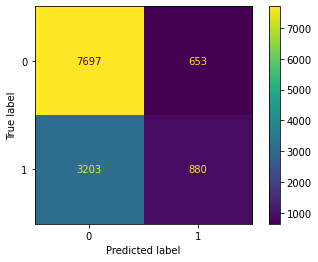

In [ ]:
cm_logreg2 = confusion_matrix(y_teste, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg2, display_labels=logreg.classes_)
disp.plot(values_format='d') 

O retorno de Falsos Negativos está muito alto. 

#### 5.1.4.3 Precisão e Recall

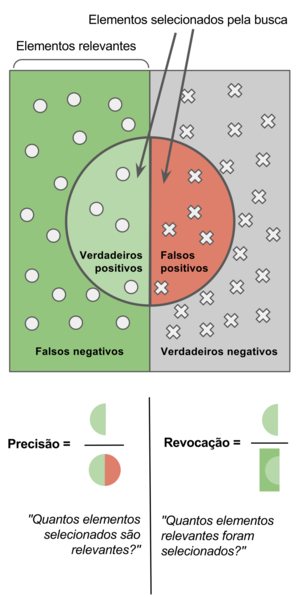

##### 5.1.4.3.1 Precisão

Sem validação cruzada

In [ ]:
%%time
precision_score(y_teste, y_pred, pos_label=0)

CPU times: user 7.59 ms, sys: 1.05 ms, total: 8.64 ms
Wall time: 8.24 ms


0.7061467889908257

##### 5.1.4.3.2 Revocação

Sem validação cruzada

In [ ]:
%%time
recall_score(y_teste, y_pred, pos_label=0)

CPU times: user 11.1 ms, sys: 73 µs, total: 11.2 ms
Wall time: 16.3 ms


0.9217964071856287

##### 5.1.2.3.3 Visualização Precisão x Revocação

Sem validação cruzada

CPU times: user 49.7 ms, sys: 38.5 ms, total: 88.2 ms
Wall time: 59.2 ms


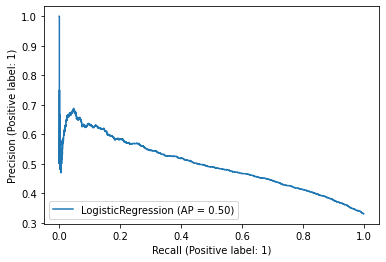

In [ ]:
%%time
disp = PrecisionRecallDisplay.from_estimator(logreg, X_teste, y_teste)

#### 5.1.4.4 F1 Score

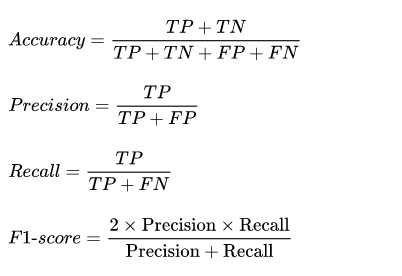

Sem validação

In [ ]:
f1_score(y_teste, y_pred, pos_label = 0)

0.7996883116883118

#### 5.1.4.5 Avaliação do modelo

Obs.: Para o modelo baseline

* As métricas da regressão logística com e sem validação cruzada diferem muito pouco
* A acurácia de 0.68 indica que o modelo acerta 68% das predições.
* A precisão de 0.70 indica que quando o modelo afirma que um caso virá a óbito, ele acerta 70% das vezes. A revocação de 0.92 indica que o modelo detecta 92% dos óbitos.
* Este modelo não seria um bom classificador para este estudo. Vamos tentar melhorá-lo trabalhando com *Trade-off precisão/revocação* para buscar aumentar a revocação. A precisão pode diminuir bastante, mas um número maior de óbitos poderão ser detectados.

## 5.2 Curva ROC

In [ ]:
from sklearn import metrics

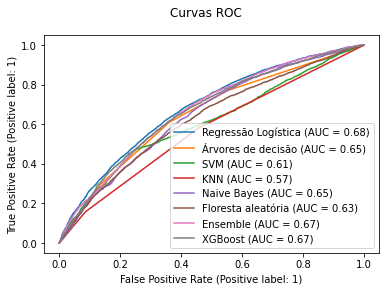

CPU times: user 33.5 s, sys: 326 ms, total: 33.9 s
Wall time: 33.4 s


In [ ]:
%%time
curvas_roc = metrics.plot_roc_curve(logreg, X_teste, y_teste, 
                                              name='Regressão Logística')

plt.show()

## 5.9 Comparação dos modelos de classificação

### 5.9.1 Sem balanceamento, sem idade normalizada e sem feature de quantidade de doenças

| Modelo | Acurácia| Precisão| Revocação|F1 Score|
|--------|---------|---------|----------|--------|
|Regressão logística| 0.68 | 0.70|0.92|0.80|
|Árvores de Decisão|0.68|0.71|0.86|0.78|
|Máquina de vetores de suporte|0.67|0.68|*0.99**|0.80|
|Classificador KNN| 0.65| 0.44| 0.14| 0.78|
|Naive Bayes| 0.66| 0.46| 0.29| 0.76|
|Florestas Aleatórias| 0.67| 0.49| 0.28| 0.78|
|Ensemble| 0.68| 0.54| 0.21 | 0.79|
|XGBoost| 0.68|0.52|0.23| 0.79|

*Diminui muito o VP.